In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import yfinance as yf
import pandas as pd

### Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [3]:
tesla = yf.Ticker("TSLA")

In [4]:
tesla_share_price_data = tesla.history(period = "max")

In [5]:
tesla_share_price_data.reset_index(inplace=True)
tesla_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [6]:
import requests
from bs4 import BeautifulSoup

In [7]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
data = requests.get(url).text

In [8]:
table = pd.read_html(data, match = 'Annual Revenue', header=0, encoding='utf-8')

In [9]:
tesla_revenue = table[0]
tesla_revenue.columns = ['Year', 'Annual Revenue']

In [10]:
tesla_revenue['Annual Revenue'] = tesla_revenue['Annual Revenue'].str.replace('$', '')
tesla_revenue['Annual Revenue'] = tesla_revenue['Annual Revenue'].str.replace(',', '')

<ipython-input-10-85e6e27094cc>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tesla_revenue['Annual Revenue'] = tesla_revenue['Annual Revenue'].str.replace('$', '')


In [11]:
tesla_revenue.tail()

,Year,Annual Revenue
9,2013,2013
10,2012,413
11,2011,204
12,2010,117
13,2009,112


### Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [12]:
gme = yf.Ticker("GME")
gme_share_price_data = gme.history(period="max")
gme_share_price_data.reset_index(inplace=True)
gme_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


### Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [13]:
url = "https://www.macrotrends.net/stocks/charts/GME/gmaestop/revenue"
data = requests.get(url).text

table = pd.read_html(data, match = 'Annual Revenue', header=0, encoding='utf-8')

gme_revenue = table[0]
gme_revenue.columns = ['Year', 'Annual Revenue']

gme_revenue['Annual Revenue'] = gme_revenue['Annual Revenue'].str.replace('$', '')
gme_revenue['Annual Revenue'] = gme_revenue['Annual Revenue'].str.replace(',', '')

gme_revenue.tail()

<ipython-input-13-0b9927cab0f9>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gme_revenue['Annual Revenue'] = gme_revenue['Annual Revenue'].str.replace('$', '')


,Year,Annual Revenue
9,2013,8887
10,2012,9551
11,2011,9474
12,2010,9078
13,2009,8806


### Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

In [31]:
import matplotlib.pyplot as plt

def make_graph(x1, y1, X2, Y2):

    fig, axs = plt.subplots(2,1)
    fig.subplots_adjust(hspace=1)

    axs[0].plot(x1, y1)
    axs[0].set_xlabel('date')
    axs[0].set_ylabel('close')
    axs[0].set_title('stock price')

    axs[1].plot(x2, y2)
    axs[1].set_xlabel('Year')
    axs[1].set_ylabel('Revenue')
    axs[1].set_title('Annual Revenue')

    plt.show()

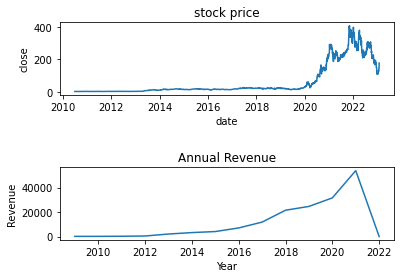

In [32]:
x1 = tesla_share_price_data['Date']
y1 = tesla_share_price_data['Close']

x2 = tesla_revenue["Year"]
y2 = tesla_revenue["Annual Revenue"]

make_graph(x1, y1, x2, y2)

### Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

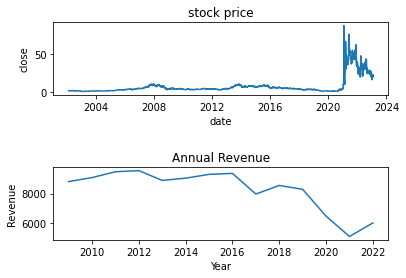

In [33]:
x1 = gme_share_price_data['Date']
y1 = gme_share_price_data['Close']

x2 = gme_revenue["Year"]
y2 = gme_revenue["Annual Revenue"]

make_graph(x1, y1, x2, y2)